Before proceeding, make sure to refer to `README.md` to download the dataset.

In [1]:
import os

from pathlib import Path
import torch
import xarray as xr
import matplotlib.pyplot as plt

import dataset

## Inspect IGRA dataset

Source: https://cds.climate.copernicus.eu/datasets/insitu-observations-igra-baseline-network?tab=overview

In [2]:
# List of IGRA variables
IGRA_VARS = ['air_temperature', 'relative_humidity', 'wind_speed', 'geopotential_height', 'air_dewpoint_depression']

In [3]:
data_dir = Path('.') / 'igra'
file_paths = [data_dir / file for file in os.listdir(data_dir)]
file_paths.sort()

file_paths[:5] # Each file represents daily observations

[PosixPath('igra/igra_full_0.25deg_20110101.nc'),
 PosixPath('igra/igra_full_0.25deg_20110102.nc'),
 PosixPath('igra/igra_full_0.25deg_20110103.nc'),
 PosixPath('igra/igra_full_0.25deg_20110104.nc'),
 PosixPath('igra/igra_full_0.25deg_20110105.nc')]

In [4]:
# Opening a sample dataset
igra_ds = xr.open_dataset(file_paths[0])

# Each data variable has latitude, longitude, and 6-hourly timestep (total of 4 per day; at 00:00, 06:00, 12:00, 18:00)
igra_ds

/burg/glab/users/jn2808/.conda/envs/bench/lib/python3.9/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


<xarray.Dataset>
Dimensions:                  (lat: 720, lon: 1440, time: 4)
Coordinates:
  * lat                      (lat) float64 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                      (lon) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                     (time) datetime64[ns] 2011-01-01 ... 2011-01-01T...
Data variables:
    air_temperature          (lat, lon, time) float64 ...
    relative_humidity        (lat, lon, time) float64 ...
    wind_speed               (lat, lon, time) float64 ...
    geopotential_height      (lat, lon, time) float64 ...
    air_dewpoint_depression  (lat, lon, time) float64 ...

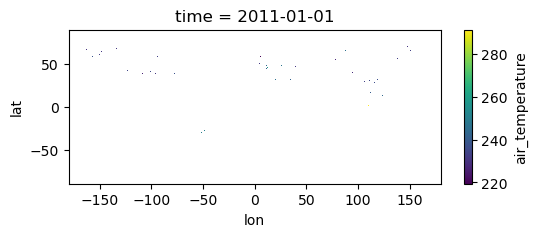

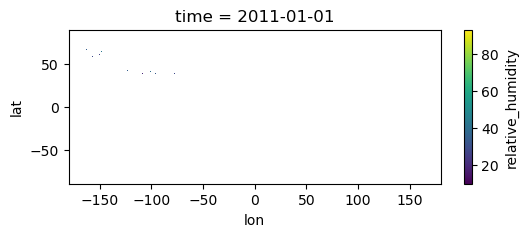

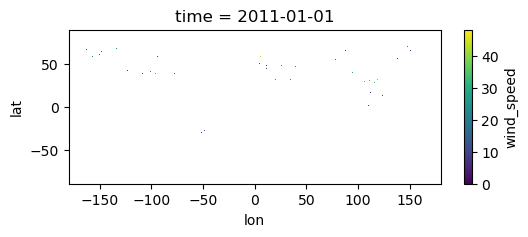

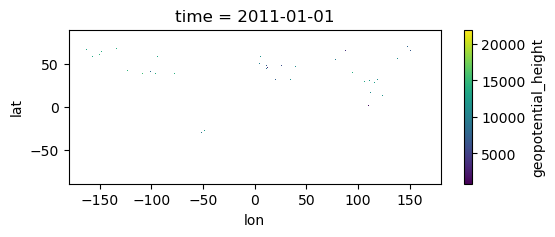

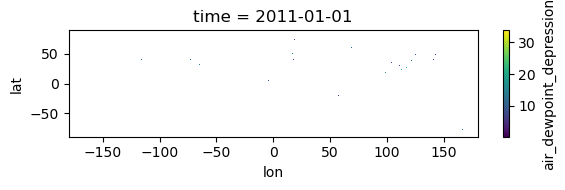

In [5]:
# Plotting IGRA dataset
igra_ds = xr.open_dataset(file_paths[0])

for i, igra_var in enumerate(IGRA_VARS):
    f, ax = plt.subplots(figsize=(6,2))
    igra_ds[IGRA_VARS][igra_var].isel(time=0).plot(ax=ax)
    
plt.tight_layout()
plt.show();

## Inspect CLARA dataset

Source: https://cds.climate.copernicus.eu/datasets/satellite-cloud-properties?tab=overview

In [6]:
# List of CLARA variables
CLARA_VARS_D = {
    'CFC': ['cfc'],
    'CTO': ['ctt', 'cth', 'ctp'],
    'IWP': ['iwp', 'cot_ice', 'cre_ice'],
    'LWP': ['lwp', 'cot_liq', 'cre_liq']
}

CLARA_VARS = [value for values_list in CLARA_VARS_D.values() for value in values_list]

In [7]:
data_dir = Path('.') / 'clara'
file_paths = [data_dir / file for file in os.listdir(data_dir)]
file_paths.sort()

file_paths[:5] # Each file represents daily observations

[PosixPath('clara/clara_full_0.25deg_20110101.nc'),
 PosixPath('clara/clara_full_0.25deg_20110102.nc'),
 PosixPath('clara/clara_full_0.25deg_20110103.nc'),
 PosixPath('clara/clara_full_0.25deg_20110104.nc'),
 PosixPath('clara/clara_full_0.25deg_20110105.nc')]

In [8]:
# Opening a sample dataset
clara_ds = xr.open_dataset(file_paths[0])

# Each data variable has latitude, longitude, and 24-hourly timestep (total of 1 per day; at 00:00)
# NOTE: different resolution from IGRA above
clara_ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    time     datetime64[ns] ...
Data variables:
    cfc      (lat, lon) float64 ...
    ctt      (lat, lon) float64 ...
    cth      (lat, lon) float64 ...
    ctp      (lat, lon) float64 ...
    iwp      (lat, lon) float64 ...
    cot_ice  (lat, lon) float64 ...
    cre_ice  (lat, lon) float64 ...
    lwp      (lat, lon) float64 ...
    cot_liq  (lat, lon) float64 ...
    cre_liq  (lat, lon) float64 ...
Attributes: (12/37)
    title:                      CM SAF cLoud, Albedo and RAdiation dataset, A...
    summary:                    This file contains AVHRR-based Thematic Clima...
    id:                         DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    product_version:            3.0
    creator_name:               DE/DWD
    creator_email:              contact.cmsaf@dwd.de
    ...                         ...
    CMSAF_platform_and_orbits:  Metop-A=15; NOAA-15=14; NOAA-16=15; NOAA-18=1...
    CMSAF_L1_processor:         PyGAC, level1c4pps
    CMSAF_L2_processor:         PPSv2018-patch5
    CMSAF_L3_processor:         CMSAFGACL3_V3.0
    variable_id:                cfc
    license:                    The CM SAF data are owned by EUMETSAT and are...

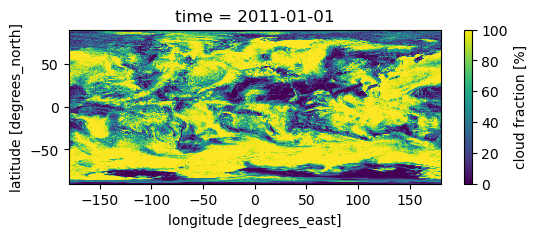

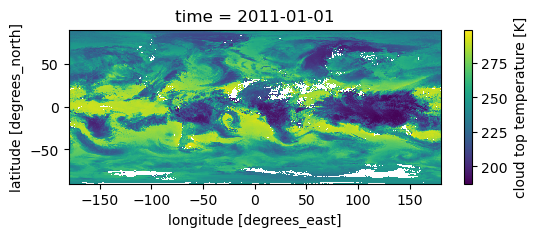

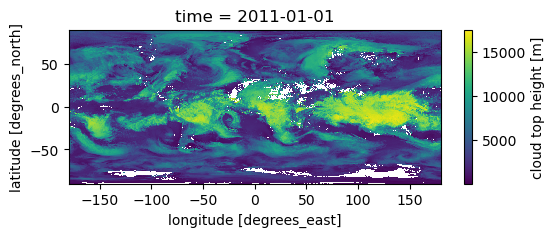

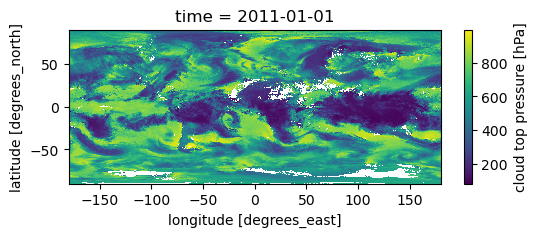

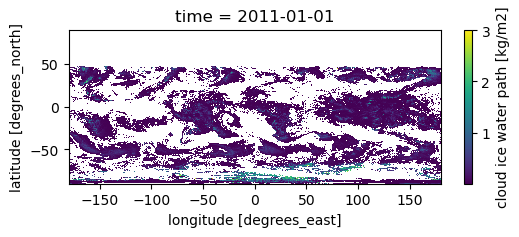

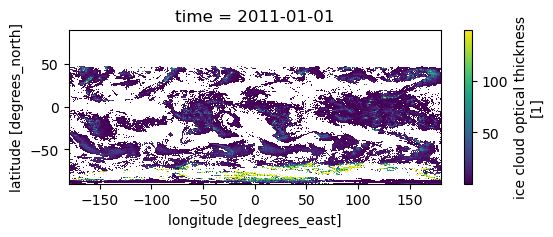

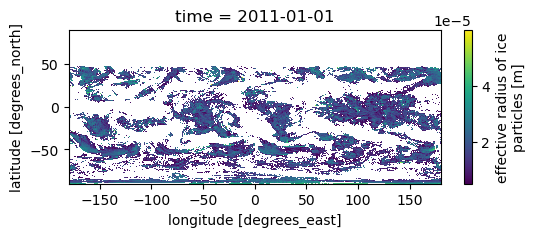

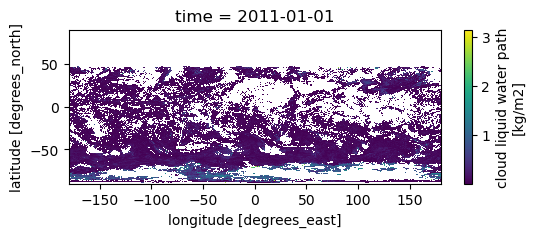

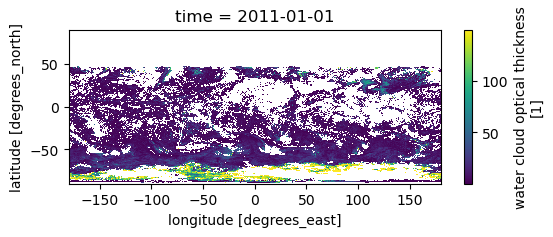

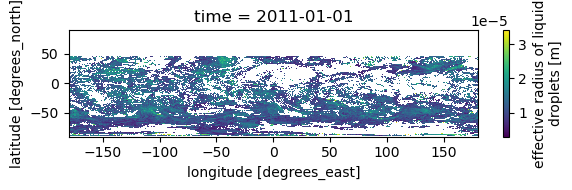

In [9]:
# Plotting CLARA dataset
clara_ds = xr.open_dataset(file_paths[0])

for i, clara_var in enumerate(CLARA_VARS):
    f, ax = plt.subplots(figsize=(6,2))
    clara_ds[CLARA_VARS][clara_var].plot(ax=ax)
    
plt.tight_layout()
plt.show();

## Convert to tensor

You can easily read the xarray dataset as array --> tensor, and concatenate them

In [10]:
# Let's view a single dataset again
clara_ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    time     datetime64[ns] ...
Data variables:
    cfc      (lat, lon) float64 ...
    ctt      (lat, lon) float64 ...
    cth      (lat, lon) float64 ...
    ctp      (lat, lon) float64 ...
    iwp      (lat, lon) float64 ...
    cot_ice  (lat, lon) float64 ...
    cre_ice  (lat, lon) float64 ...
    lwp      (lat, lon) float64 ...
    cot_liq  (lat, lon) float64 ...
    cre_liq  (lat, lon) float64 ...
Attributes: (12/37)
    title:                      CM SAF cLoud, Albedo and RAdiation dataset, A...
    summary:                    This file contains AVHRR-based Thematic Clima...
    id:                         DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    product_version:            3.0
    creator_name:               DE/DWD
    creator_email:              contact.cmsaf@dwd.de
    ...                         ...
    CMSAF_platform_and_orbits:  Metop-A=15; NOAA-15=14; NOAA-16=15; NOAA-18=1...
    CMSAF_L1_processor:         PyGAC, level1c4pps
    CMSAF_L2_processor:         PPSv2018-patch5
    CMSAF_L3_processor:         CMSAFGACL3_V3.0
    variable_id:                cfc
    license:                    The CM SAF data are owned by EUMETSAT and are...

In [11]:
# Convert to tensor
tensor = torch.tensor(
    clara_ds[CLARA_VARS].to_array().data
)

tensor.shape # (Variables, latitude, longitude)

torch.Size([10, 720, 1440])

In [12]:
clara_ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    time     datetime64[ns] ...
Data variables:
    cfc      (lat, lon) float64 9.0 10.0 10.0 10.0 10.0 ... 48.0 51.0 51.0 52.0
    ctt      (lat, lon) float64 244.8 244.8 244.8 244.8 ... 230.9 230.6 231.3
    cth      (lat, lon) float64 424.0 442.0 442.0 ... 5.139e+03 5.009e+03
    ctp      (lat, lon) float64 646.6 645.0 645.1 645.0 ... 507.6 504.1 513.4
    iwp      (lat, lon) float64 0.249 0.24 0.221 0.24 0.2 ... nan nan nan nan
    cot_ice  (lat, lon) float64 10.35 9.92 9.13 9.92 8.31 ... nan nan nan nan
    cre_ice  (lat, lon) float64 3.436e-05 3.562e-05 3.599e-05 ... nan nan nan
    lwp      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    cot_liq  (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    cre_liq  (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/37)
    title:                      CM SAF cLoud, Albedo and RAdiation dataset, A...
    summary:                    This file contains AVHRR-based Thematic Clima...
    id:                         DOI:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003
    product_version:            3.0
    creator_name:               DE/DWD
    creator_email:              contact.cmsaf@dwd.de
    ...                         ...
    CMSAF_platform_and_orbits:  Metop-A=15; NOAA-15=14; NOAA-16=15; NOAA-18=1...
    CMSAF_L1_processor:         PyGAC, level1c4pps
    CMSAF_L2_processor:         PPSv2018-patch5
    CMSAF_L3_processor:         CMSAFGACL3_V3.0
    variable_id:                cfc
    license:                    The CM SAF data are owned by EUMETSAT and are...

In [13]:
igra_ds

<xarray.Dataset>
Dimensions:                  (lat: 720, lon: 1440, time: 4)
Coordinates:
  * lat                      (lat) float64 -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                      (lon) float64 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                     (time) datetime64[ns] 2011-01-01 ... 2011-01-01T...
Data variables:
    air_temperature          (lat, lon, time) float64 ...
    relative_humidity        (lat, lon, time) float64 ...
    wind_speed               (lat, lon, time) float64 ...
    geopotential_height      (lat, lon, time) float64 ...
    air_dewpoint_depression  (lat, lon, time) float64 ...

In [14]:
# You can also concatenate along the channel dimensions for both dataset
# Say we want to combine at 00:00 hours

igra_tensor = torch.tensor(
    igra_ds[IGRA_VARS].isel(time=0).to_array().data # Selecting the first time index i.e., 00:00
)

clara_tensor = torch.tensor(
    clara_ds[CLARA_VARS].to_array().data # Since this is only available at 00:00 snapshot, one workaround is to repeat for 06:00, 12:00, 18:00
)


# Combined tensor has 15 (10+5) channels now...
combined_tensor = torch.cat([igra_tensor, clara_tensor], dim=0)
combined_tensor.shape


torch.Size([15, 720, 1440])

## Normalization

In order to make the inputs dimensionless, we also provide their mean and sigma

In [15]:
# For CLARA (you can do similarly for IGRA)
clara_climatology = xr.open_dataset('climatology/climatology_clara.zarr', engine='zarr')
clara_climatology

<xarray.Dataset>
Dimensions:  (param: 10)
Coordinates:
  * param    (param) <U7 'cfc' 'ctt' 'cth' 'ctp' ... 'lwp' 'cot_liq' 'cre_liq'
Data variables:
    mean     (param) float64 ...
    sigma    (param) float64 ...

In [16]:
# Convert mean/sigma to torch tensor
clara_mean = torch.tensor(clara_climatology['mean'].values)
clara_sigma = torch.tensor(clara_climatology['sigma'].values)

In [17]:
# Let's z-normalize
# NOTE: broadcasting with .view()
clara_normalized = (clara_tensor - clara_mean.view(-1, *[1] * (clara_tensor.dim() - 1))) / clara_sigma.view(-1, *[1] * (clara_tensor.dim() - 1))

clara_normalized.shape

torch.Size([10, 720, 1440])

## Constructing torch.Dataset class

In [18]:
# We provide dataset class to jointly process and load multimodal data

mode = 'train' # You can choose one of 'train' / 'val' / 'test' for mode
window = 2 # How many consecutive observations (time window) do you want to extract

train_dataset = dataset.MultimodalDataset(
    [
        dataset.ERA5Dataset(window=window, mode=mode, flatten=False),
        dataset.AuxDataset(data_var='clara', window=window, mode=mode, flatten=False),
        dataset.AuxDataset(data_var='igra', window=window, mode=mode, flatten=False)
    ]
)

In [19]:
# NOTE: the list of variables for ERA5 is indexed according to 
# https://arxiv.org/pdf/2202.11214 (Table 1)

x, _ = next(iter(train_dataset))
x.shape # concatenation of ERA5/Clara/IGRA (21/10/5 channels) plus the window size

torch.Size([2, 36, 720, 1440])